In [51]:
##Hardware
import torch
if torch.cuda.is_available() == True:
  device = 'cuda'
  templist = [1,2,3]
  templist = torch.FloatTensor(templist).to(device)
  print("Cuda torch working : ",end="")
  print(templist.is_cuda)
  print("current device no. : ",end="")
  print(torch.cuda.current_device())
  print("GPU device count : ",end="")
  print(torch.cuda.device_count())
  print("GPU name : ",end="")
  print(torch.cuda.get_device_name(0))
  print("device : ",device)
  ! nvidia-smi
elif torch.backends.mps.is_available() == True:
  print("Apple device detected\nActivating Apple Silicon GPU")
  device = torch.device("mps")
else:
  print("cant use gpu , activating cpu")
  device = 'cpu'

Cuda torch working : True
current device no. : 0
GPU device count : 1
GPU name : NVIDIA GeForce GTX 1080
device :  cuda
Mon Jan 30 16:40:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| 42%   28C    P8    10W / 180W |   6447MiB /  8192MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+---------------

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [53]:
# Load the CIFAR-10 dataset
num_subprocesses = 8

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                        shuffle=True, num_workers=num_subprocesses)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                        shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [54]:
len(testset)

10000

In [55]:
""" # CNN with 3 layer
# Define the CNN model
class Net(nn.Module):
    def __init__(self,dropout_rate = 0.1):
        super(Net, self).__init__()
        self.dropout_rate = dropout_rate
        self.conv1 = nn.Conv2d(in_channels = 3,out_channels= 6,kernel_size= 5)
        self.pool = nn.MaxPool2d(kernel_size= 2,stride= 2)
        self.conv2 = nn.Conv2d(in_channels= 6,out_channels= 16,kernel_size= 5)
        self.fc1 = nn.Linear(in_features= 16 * 5 * 5,out_features= 120)
        self.fc2 = nn.Linear(in_features= 120,out_features= 84)
        self.fc3 = nn.Linear(in_features= 84,out_features= 10)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x
"""

' # CNN with 3 layer\n# Define the CNN model\nclass Net(nn.Module):\n    def __init__(self,dropout_rate = 0.1):\n        super(Net, self).__init__()\n        self.dropout_rate = dropout_rate\n        self.conv1 = nn.Conv2d(in_channels = 3,out_channels= 6,kernel_size= 5)\n        self.pool = nn.MaxPool2d(kernel_size= 2,stride= 2)\n        self.conv2 = nn.Conv2d(in_channels= 6,out_channels= 16,kernel_size= 5)\n        self.fc1 = nn.Linear(in_features= 16 * 5 * 5,out_features= 120)\n        self.fc2 = nn.Linear(in_features= 120,out_features= 84)\n        self.fc3 = nn.Linear(in_features= 84,out_features= 10)\n        \n    def forward(self, x):\n        x = self.pool(nn.functional.relu(self.conv1(x)))\n        x = self.pool(nn.functional.relu(self.conv2(x)))\n        x = x.view(-1, 16 * 5 * 5)\n        x = nn.functional.relu(self.fc1(x))\n        x = nn.functional.relu(self.fc2(x))\n        x = self.fc3(x)\n        return x\n'

In [56]:
"""CNN with 5layer
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(512*1*1, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
"""

'CNN with 5layer\nimport torch.nn as nn\nimport torch.nn.functional as F\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.layer1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),\n            nn.BatchNorm2d(32),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, stride=2))\n        self.layer2 = nn.Sequential(\n            nn.Conv2d(32, 64, kernel_size=3, padding=1),\n            nn.BatchNorm2d(64),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, stride=2))\n        self.layer3 = nn.Sequential(\n            nn.Conv2d(64, 128, kernel_size=3, padding=1),\n            nn.BatchNorm2d(128),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, stride=2))\n        self.layer4 = nn.Sequential(\n            nn.Conv2d(128, 256, kernel_size=3, padding=1),\n            nn.BatchNorm2d(256),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, st

In [57]:
#CNN with 5 layer + dropout

import torch.nn as nn
class Net(nn.Module):
    def __init__(self,dropout_rate = 0.1):
        super(Net,self).__init__()
        self.dropout_rate = dropout_rate
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,96,2,1,0),
            nn.ReLU(),
            nn.MaxPool2d(2,1)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(96,256,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(3,2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(256,384,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,1,1)
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(384,384,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,1,1)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(384,256,3,1,1),
            nn.ReLU(),
            nn.MaxPool2d(3,2)
        )
        
        self.f1 = nn.Linear(256*6*6,4096)
        self.f2 = nn.Linear(4096,4096)
        self.f3 = nn.Linear(4096,10)
        
    def forward(self,x):
        out = self.layer1(x)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out = self.layer3(out)
        #print(out.shape)
        out = self.layer4(out)
        #print(out.shape)
        out = self.layer5(out)
        #print(out.shape)
        out = out.view(out.size(0),-1)
        #out = out.view(-1,256*6*6)
        out = nn.functional.relu(self.f1(out))
        out = nn.functional.dropout(out,self.dropout_rate)
        out = nn.functional.relu(self.f2(out))
        out = nn.functional.dropout(out,self.dropout_rate)
        out = self.f3(out)
        out = nn.functional.log_softmax(out,dim=1)
        
        return out
    
net = Net().to(device)

#Accuracy of the net on the test set: 82.27%

In [58]:
#This model cant learn
"""
import torch
import torch.nn as nn



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=2, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1),
            nn.Dropout(0.25)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )

        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer6 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer7 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Dropout(0.25)
        )
        
        self.layer8 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(0.25)
        )
        
        self.layer9 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(0.5)
        )
        self.layer10 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10),
            nn.Softmax(dim=1)
        )
        
    def forward(self, x):
        x = self.layer1(x)
        #print(x.shape)
        x = self.layer2(x)
        #print(x.shape)
        x = self.layer3(x)
        #print(x.shape)
        x = self.layer4(x)
        #print(x.shape)
        x = self.layer5(x)
        #print(x.shape)
        x = self.layer6(x)
        #print(x.shape)
        x = self.layer7(x)
        #print(x.shape)
        x = self.layer8(x)
        #print(x.shape)
        x = self.layer9(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.layer10(x)
        
        return x
        """

'\nimport torch\nimport torch.nn as nn\n\n\n\nclass Net(nn.Module):\n    def __init__(self):\n        super(Net, self).__init__()\n        self.layer1 = nn.Sequential(\n            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=2, stride=1, padding=0),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=2, stride=1),\n            nn.Dropout(0.25)\n        )\n        \n        self.layer2 = nn.Sequential(\n            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),\n            nn.ReLU(),\n            nn.MaxPool2d(kernel_size=3, stride=2),\n            nn.Dropout(0.25)\n        )\n        \n        self.layer3 = nn.Sequential(\n            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),\n            nn.ReLU(),\n            nn.Dropout(0.25)\n        )\n\n        self.layer4 = nn.Sequential(\n            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),\n            nn.ReLU(

In [59]:
### VARIABLE ###
#lr_list = [100000,10000,1000,100,10,1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
#lr_list = [1e-1,1e-3,1e-6]
lr_list = [1e-2]
opt_mementum = 0.9
nb_epoch = 10
dprate = 0.1

for LR in lr_list:

    net = Net().to(device)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = optim.SGD(net.parameters(), lr=LR, momentum=opt_mementum) #momentum for avoid getting stuck in local optima or oscillating

    # Train the model
    from tqdm import tqdm
    for epoch in tqdm(range(nb_epoch)):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            #print(inputs.shape)
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()
            #if i % 2000 == 1999:    # print every 2000 mini-batch
        print(LR,loss.item())

 10%|█         | 1/10 [01:23<12:29, 83.33s/it]

0.01 1.442305564880371


 20%|██        | 2/10 [03:02<12:19, 92.47s/it]

0.01 1.3314447402954102


 30%|███       | 3/10 [04:27<10:24, 89.24s/it]

0.01 1.058763861656189


 40%|████      | 4/10 [05:48<08:36, 86.07s/it]

0.01 0.8579880595207214


 50%|█████     | 5/10 [07:09<07:00, 84.11s/it]

0.01 0.644990086555481


 60%|██████    | 6/10 [08:28<05:29, 82.46s/it]

0.01 0.5698713064193726


 70%|███████   | 7/10 [09:48<04:04, 81.59s/it]

0.01 0.4999241530895233


 80%|████████  | 8/10 [11:08<02:42, 81.02s/it]

0.01 0.2782863676548004


 90%|█████████ | 9/10 [12:30<01:21, 81.30s/it]

0.01 0.24767045676708221


100%|██████████| 10/10 [13:52<00:00, 83.21s/it]

0.01 0.37341389060020447


#### Cost by LR  
1000 nan  
100 nan  
10 nan  
1 nan  
0.1 1.4555832147598267  
#### 0.01 0.8523364067077637  
0.001 1.3504940271377563  
0.0001 2.3020293712615967  
1e-05 2.3091320991516113  
1e-06 2.307286024093628  

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) normalizes the data to have a mean of 0.5 and a standard deviation of 0.5.  
This is a common preprocessing step in deep learning, as it helps improve model performance and prevent overfitting.  

In [60]:
#if there is a CUDA memeory error, change the batch size(reduce it)
net.eval()

# Calculate the accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print("Accuracy of the net on the test set: {}%".format(accuracy))


Accuracy of the net on the test set: 82.2%


In [61]:
import numpy as np
import matplotlib.pyplot as plt

num_of_examples = 10 #only even numbers (please)
num_cols = 2
num_rows = int(num_of_examples/num_cols)

print("showing at least %s of the errors"%num_of_examples)

def imshow(img):
	img = img / 2 + 0.5 # unnormalize
	npimg = img.cpu().numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))#rearranges the dimensions of the image array from (C, H, W) (color channel, height, width) to (H, W, C)
	plt.axis('off')

wrong_images = []
wrong_preds = []
wrong_labels = []
#image list of the CIFAR-10 in text
img_list = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
cnt = 0
with torch.no_grad():
	for data in testloader:
		inputs, labels = data
		inputs, labels = inputs.to(device), labels.to(device)
		outputs = net(inputs)
		_, predicted = torch.max(outputs.data, 1)
		cnt = cnt + 1
# Store the wrongly guessed images, predictions, and actual answers
for i, (p, l) in enumerate(zip(predicted, labels)):
	if p != l:
		wrong_images.append(inputs[i])
		wrong_preds.append(p.item())
		wrong_labels.append(l.item())


showing at least 10 of the errors


In [62]:
testloader.batch_size

1000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

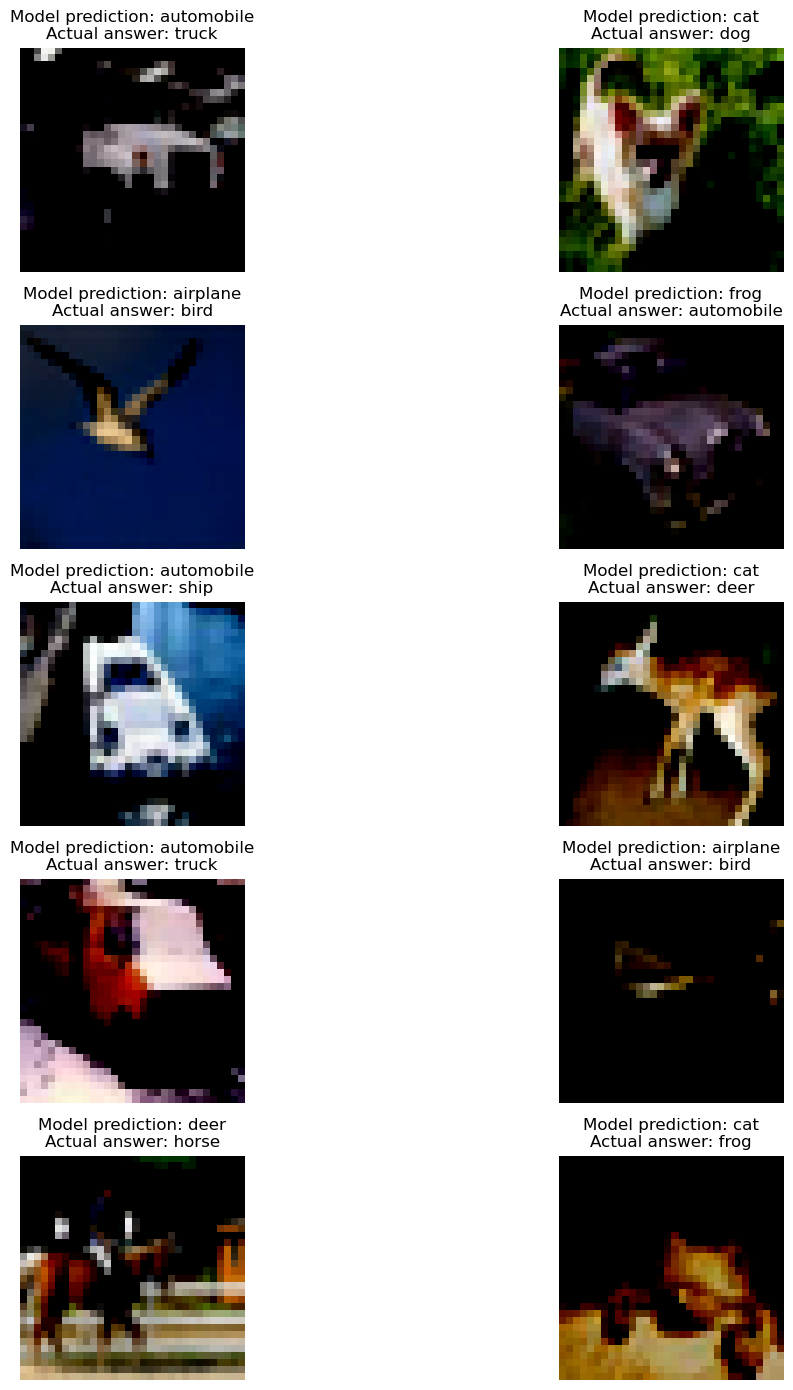

In [63]:
import random
fig, ax = plt.subplots(num_rows, num_cols, figsize=(14, 14))

for i, (img, p, l) in enumerate(zip(wrong_images, wrong_preds, wrong_labels)):
	num = random.randrange(0,len(wrong_images))
	img , p , l = wrong_images[num], wrong_preds[num], wrong_labels[num]
	r = i // num_cols
	c = i % num_cols
	try:
		ax[r, c].imshow(np.transpose(torchvision.utils.make_grid(img).to('cpu').numpy(), (1, 2, 0)))
		ax[r, c].set_title("Model prediction: {}\nActual answer: {}".format(img_list[p], img_list[l]))
		ax[r, c].axis('off')
	except:
		break
	if i > num_of_examples: #print only 10
		break
plt.tight_layout()
plt.show()